In [1]:
import numpy as np 
import pandas as pd 
import bz2
import re 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2


In [3]:
train_file = bz2.BZ2File('../input/amazonreviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('../input/amazonreviews/test.ft.txt.bz2')

In [4]:
#Reading Data set
train_file = train_file.readlines()
test_file = test_file.readlines()

In [5]:
print("Number of training reivews: " + str(len(train_file)))
print("Number of test reviews: " + str(len(test_file)))

Number of training reivews: 3600000
Number of test reviews: 400000


In [6]:
#training on the first 10000 reviews in the  dataset
num_train = 100000
#Using 2000 reviews from test set
num_test = 20000#Using 200,000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [7]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

In [8]:
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

In [9]:
train = pd.DataFrame({'text':train_sentences,'label':train_labels})
test=pd.DataFrame({'text':test_sentences,'label':test_labels})

In [10]:
train.head(10)

,text,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1
5,an absolute masterpiece: i am quite sure any o...,1
6,"buyer beware: this is a self-published book, a...",0
7,glorious story: i loved whisper of the wicked ...,1
8,a five star book: i just finished reading whis...,1
9,whispers of the wicked saints: this was a easy...,1


In [11]:
train['number_of_words'] = train['text'].str.lower().str.split().apply(len)
train.head()

,text,label,number_of_words
0,stuning even for the non-gamer: this sound tra...,1,80
1,the best soundtrack ever to anything.: i'm rea...,1,97
2,amazing!: this soundtrack is my favorite music...,1,129
3,excellent soundtrack: i truly like this soundt...,1,118
4,"remember, pull your jaw off the floor after he...",1,87


In [12]:
test['number_of_words'] = test['text'].str.lower().str.split().apply(len)
test.head()

,text,label,number_of_words
0,great cd: my lovely pat has one of the great v...,1,106
1,one of the best game music soundtracks - for a...,1,148
2,batteries died within a year ...: i bought thi...,0,60
3,"works fine, but maha energy is better: check o...",1,37
4,great for the non-audiophile: reviewed quite a...,1,69


<AxesSubplot:xlabel='label', ylabel='count'>

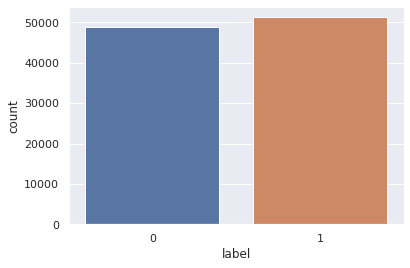

In [13]:
import seaborn as sns
sns.set(style='darkgrid')
sns.countplot(x="label", data = train)

<AxesSubplot:ylabel='Frequency'>

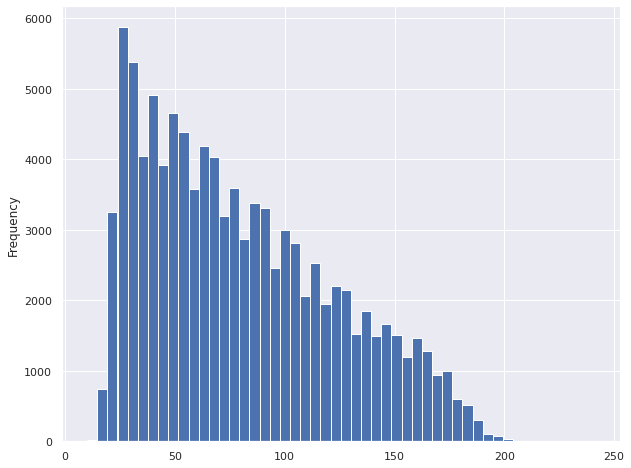

In [14]:
train['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 

In [15]:
import re
import nltk


In [16]:
def remove_url(text):
     url=re.compile(r"https?://\S+|www\.\S+")
     return url.sub(r" ",text)

def remove_html(text):
  cleanr = re.compile('<.*?>')
  return cleanr.sub(r" ",text)



def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output


import string
def remove_punc(text):
   table=str.maketrans(' ',' ',string.punctuation)
   return text.translate(table)



nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
 
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train['text']=train.text.map(lambda x:remove_url(x))
train['text']=train.text.map(lambda x:remove_html(x))
train['text']=train.text.map(lambda x:remove_punc(x))
train['text']=train['text'].map(remove_num)
train['text']=train['text'].map(remove_stopword)

In [18]:
test['text']=test.text.map(lambda x:remove_url(x))
test['text']=test.text.map(lambda x:remove_html(x))
test['text']=test.text.map(lambda x:remove_punc(x))
test['text']=test['text'].map(remove_num)
test['text']=test['text'].map(remove_stopword)

In [19]:
train.head()

,text,label,number_of_words
0,stuning even nongamer sound track beautiful pa...,1,80
1,best soundtrack ever anything im reading lot r...,1,97
2,amazing soundtrack favorite music time hands i...,1,129
3,excellent soundtrack truly like soundtrack enj...,1,118
4,remember pull jaw floor hearing youve played g...,1,87


In [20]:
import nltk

def Stemming(text):
   stem=[]
   from nltk.corpus import stopwords
   from nltk.stem import SnowballStemmer
  #is based on The Porter Stemming Algorithm
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [21]:

    train['text']=train['text'].map(Stemming)
    test['text']=test['text'].map(Stemming)

In [22]:
train.head()

,text,label,number_of_words
0,stune even nongam sound track beauti paint sen...,1,80
1,best soundtrack ever anyth im read lot review ...,1,97
2,amaz soundtrack favorit music time hand intens...,1,129
3,excel soundtrack truli like soundtrack enjoy v...,1,118
4,rememb pull jaw floor hear youv play game know...,1,87


In [23]:
max_length=100
vocab_size=12000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [24]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train['text'])

In [25]:
tokenizer

In [26]:
word_index = tokenizer.word_index

In [27]:
training_sequences = tokenizer.texts_to_sequences(train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test['text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [28]:
training_padded[1]

array([  25,  805,   51,  181,   52,    6,   86,   49,   45,   25,  113,
        805,  483,  309,  101,   49, 2068,  161,    1,    1,    1, 1069,
        735,   43, 1571,   52,  111,   29,  173,  315, 1829,    1,  132,
       2734,  160, 7108,  112,   45,   31,   23,   37,   21,   75,    3,
         90,   11,  100,   93, 2076,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [29]:
print(training_sequences[1])

[25, 805, 51, 181, 52, 6, 86, 49, 45, 25, 113, 805, 483, 309, 101, 49, 2068, 161, 1, 1, 1, 1069, 735, 43, 1571, 52, 111, 29, 173, 315, 1829, 1, 132, 2734, 160, 7108, 112, 45, 31, 23, 37, 21, 75, 3, 90, 11, 100, 93, 2076]


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from keras.preprocessing import sequence
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           768000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               657408    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 1,425,921
Trainable params: 1,425,921
Non-trainable params: 0
_________________________________________________________________


In [32]:
adam=Adam(lr=0.0001)

In [33]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )

In [34]:
train.head()

,text,label,number_of_words
0,stune even nongam sound track beauti paint sen...,1,80
1,best soundtrack ever anyth im read lot review ...,1,97
2,amaz soundtrack favorit music time hand intens...,1,129
3,excel soundtrack truli like soundtrack enjoy v...,1,118
4,rememb pull jaw floor hear youv play game know...,1,87


In [35]:
history=model.fit(training_padded,train['label'], epochs=15, batch_size=256,verbose = 1,callbacks = 
                  [EarlyStopping(monitor='val_accuracy', patience=2)],
                  validation_data=(testing_padded,test['label']))

Epoch 1/15
391/391 [==============================] - 25s 49ms/step - loss: 0.6209 - accuracy: 0.6219 - val_loss: 0.3666 - val_accuracy: 0.8471
Epoch 2/15
391/391 [==============================] - 18s 47ms/step - loss: 0.3526 - accuracy: 0.8510 - val_loss: 0.3262 - val_accuracy: 0.8633
Epoch 3/15
391/391 [==============================] - 19s 48ms/step - loss: 0.3044 - accuracy: 0.8761 - val_loss: 0.3087 - val_accuracy: 0.8707
Epoch 4/15
391/391 [==============================] - 18s 47ms/step - loss: 0.2810 - accuracy: 0.8856 - val_loss: 0.2960 - val_accuracy: 0.8759
Epoch 5/15
391/391 [==============================] - 19s 48ms/step - loss: 0.2589 - accuracy: 0.8954 - val_loss: 0.2881 - val_accuracy: 0.8784
Epoch 6/15
391/391 [==============================] - 18s 47ms/step - loss: 0.2461 - accuracy: 0.9005 - val_loss: 0.2840 - val_accuracy: 0.8795
Epoch 7/15
391/391 [==============================] - 19s 47ms/step - loss: 0.2360 - accuracy: 0.9048 - val_loss: 0.2815 - val_accuracy:

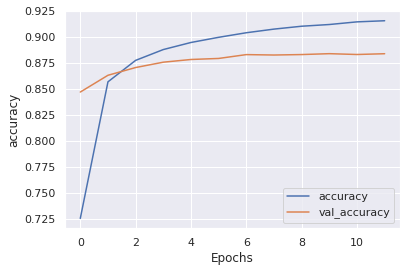

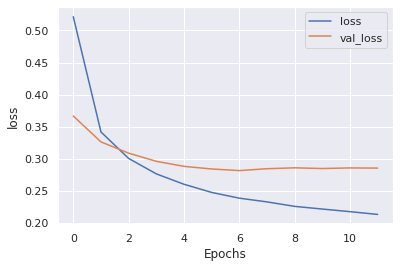

In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
def Review(sentence):
   sequences = tokenizer.texts_to_sequences(sentence)
   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

   prob=model.predict(padded)
   if prob>=0.8:
     print(5)
   elif prob>=0.6:
     print(4)
   elif prob>=0.4:
     print(3) 
   elif prob>=0.2:
     print(2)   
   else:
       print(1)

In [38]:
sentence=['this is worst thing donot buy it']
Review(sentence)

1


In [39]:
sentence=['Hurrey!! India won the match']
Review(sentence)

4


In [40]:
sentence=['sad, i lost my watch']
Review(sentence)

1


In [41]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded
y_test=test['label']

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.884000
Precision: 0.882906
Recall: 0.891032
F1 score: 0.886951
ROC AUC: 0.883846
[[8579 1207]
 [1113 9101]]


In [44]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      9786
           1       0.88      0.89      0.89     10214

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



<AxesSubplot:>

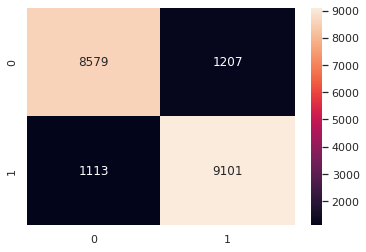

In [45]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

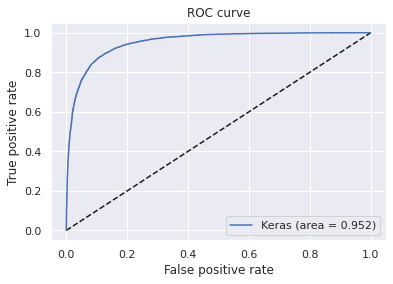

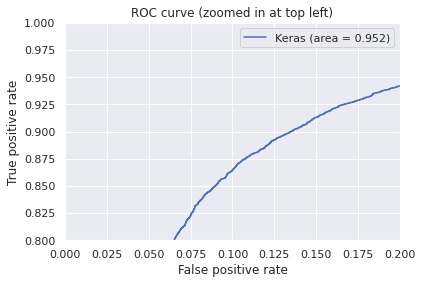

In [46]:
#ROC Curve

from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()